# **Olist** **Veri** **Analizi** **Projesi**      
**TEAM** **3**                      
**Begüm** **Yapıcıoğlu**

**Selen** **İmahanoğlu**

**Ülkü** **Ülkü**

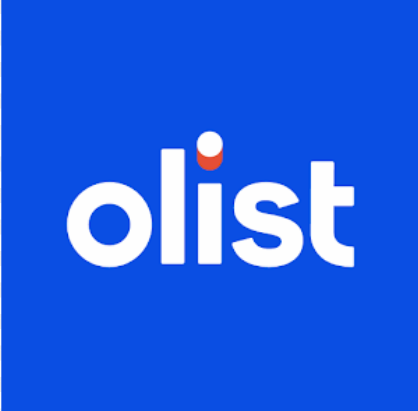


#**DOSYA** **YÜKLEME**

In [ ]:
import pandas as pd
import numpy as np

# Dosyaları yükleyelim
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# Verilerin genel yapısını inceleyelim (head ve info)
dfs = {
    "Customers": customers,
    "Orders": orders,
    "Items": items,
    "Payments": payments,
    "Reviews": reviews,
    "Products": products
}

for name, df in dfs.items():
    print(f"--- {name} ---")
    print(df.info())
    print(df.head(2))
    print("\n")

--- Customers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  


--- Orders ---


# **VERİ** **SETİ** **HAZIRLAMA**

In [ ]:
# 1. Tarih sütunlarını datetime formatına çevirelim
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# 2. Veri setlerini birleştirdik
# Önce Orders ve Items'ı birleştirdik
df = pd.merge(orders, items, on='order_id', how='left')

# Sonra Customers, Payments, Reviews ve Products'ı ekledik
df = pd.merge(df, customers, on='customer_id', how='left')
df = pd.merge(df, payments, on='order_id', how='left')
df = pd.merge(df, reviews, on='order_id', how='left')
df = pd.merge(df, products[['product_id', 'product_category_name']], on='product_id', how='left')

# 3. Kargo süresi hesaplama (gün cinsinden)
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# 4. Eksik değerleri kontrol ettik
missing_values = df.isnull().sum()

# Temizlenmiş verinin ilk haline bakicaz
print(f"Toplam Satır Sayısı: {len(df)}")
print("\nEksik Değerler:")
print(missing_values[missing_values > 0])
print("\nVeri seti hazır!")

Toplam Satır Sayısı: 151767

Eksik Değerler:
order_approved_at                   223
order_delivered_carrier_date       2681
order_delivered_customer_date      4379
order_item_id                      1077
product_id                         1077
seller_id                          1077
shipping_limit_date                1077
price                              1077
freight_value                      1077
payment_sequential                    4
payment_type                          4
payment_installments                  4
payment_value                         4
review_id                          1319
review_score                       1319
review_comment_title             133836
review_comment_message            87784
review_creation_date               1319
review_answer_timestamp            1319
product_category_name              3235
delivery_time                      4379
dtype: int64

Veri seti hazır!


#**GENEL** **İSTATİSTİKLER VE GRAFİKLER** - **SİPARİŞ** - **ÖDEME** -**KARGO** -**KATEGORİ**

--- Sipariş Fiyatı İstatistikleri ---
count    150690.000000
mean        120.720801
std         185.185272
min           0.850000
25%          39.900000
50%          74.900000
75%         134.000000
max        6735.000000
Name: price, dtype: float64

--- Teslimat Süresi (Gün) İstatistikleri ---
count    147388.000000
mean         12.012091
std           9.475766
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: delivery_time, dtype: float64

--- Memnuniyet Puanı İstatistikleri ---
count    150448.000000
mean          4.017069
std           1.399421
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

Genel Müşteri Memnuniyet Oranı (4-5 Puan): %75.11


/tmp/ipython-input-19456163.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette=cok_renkli_palet)
/tmp/ipython-input-19456163.py:63: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_categories.values, y=top_categories.index, palette=cok_renkli_palet)


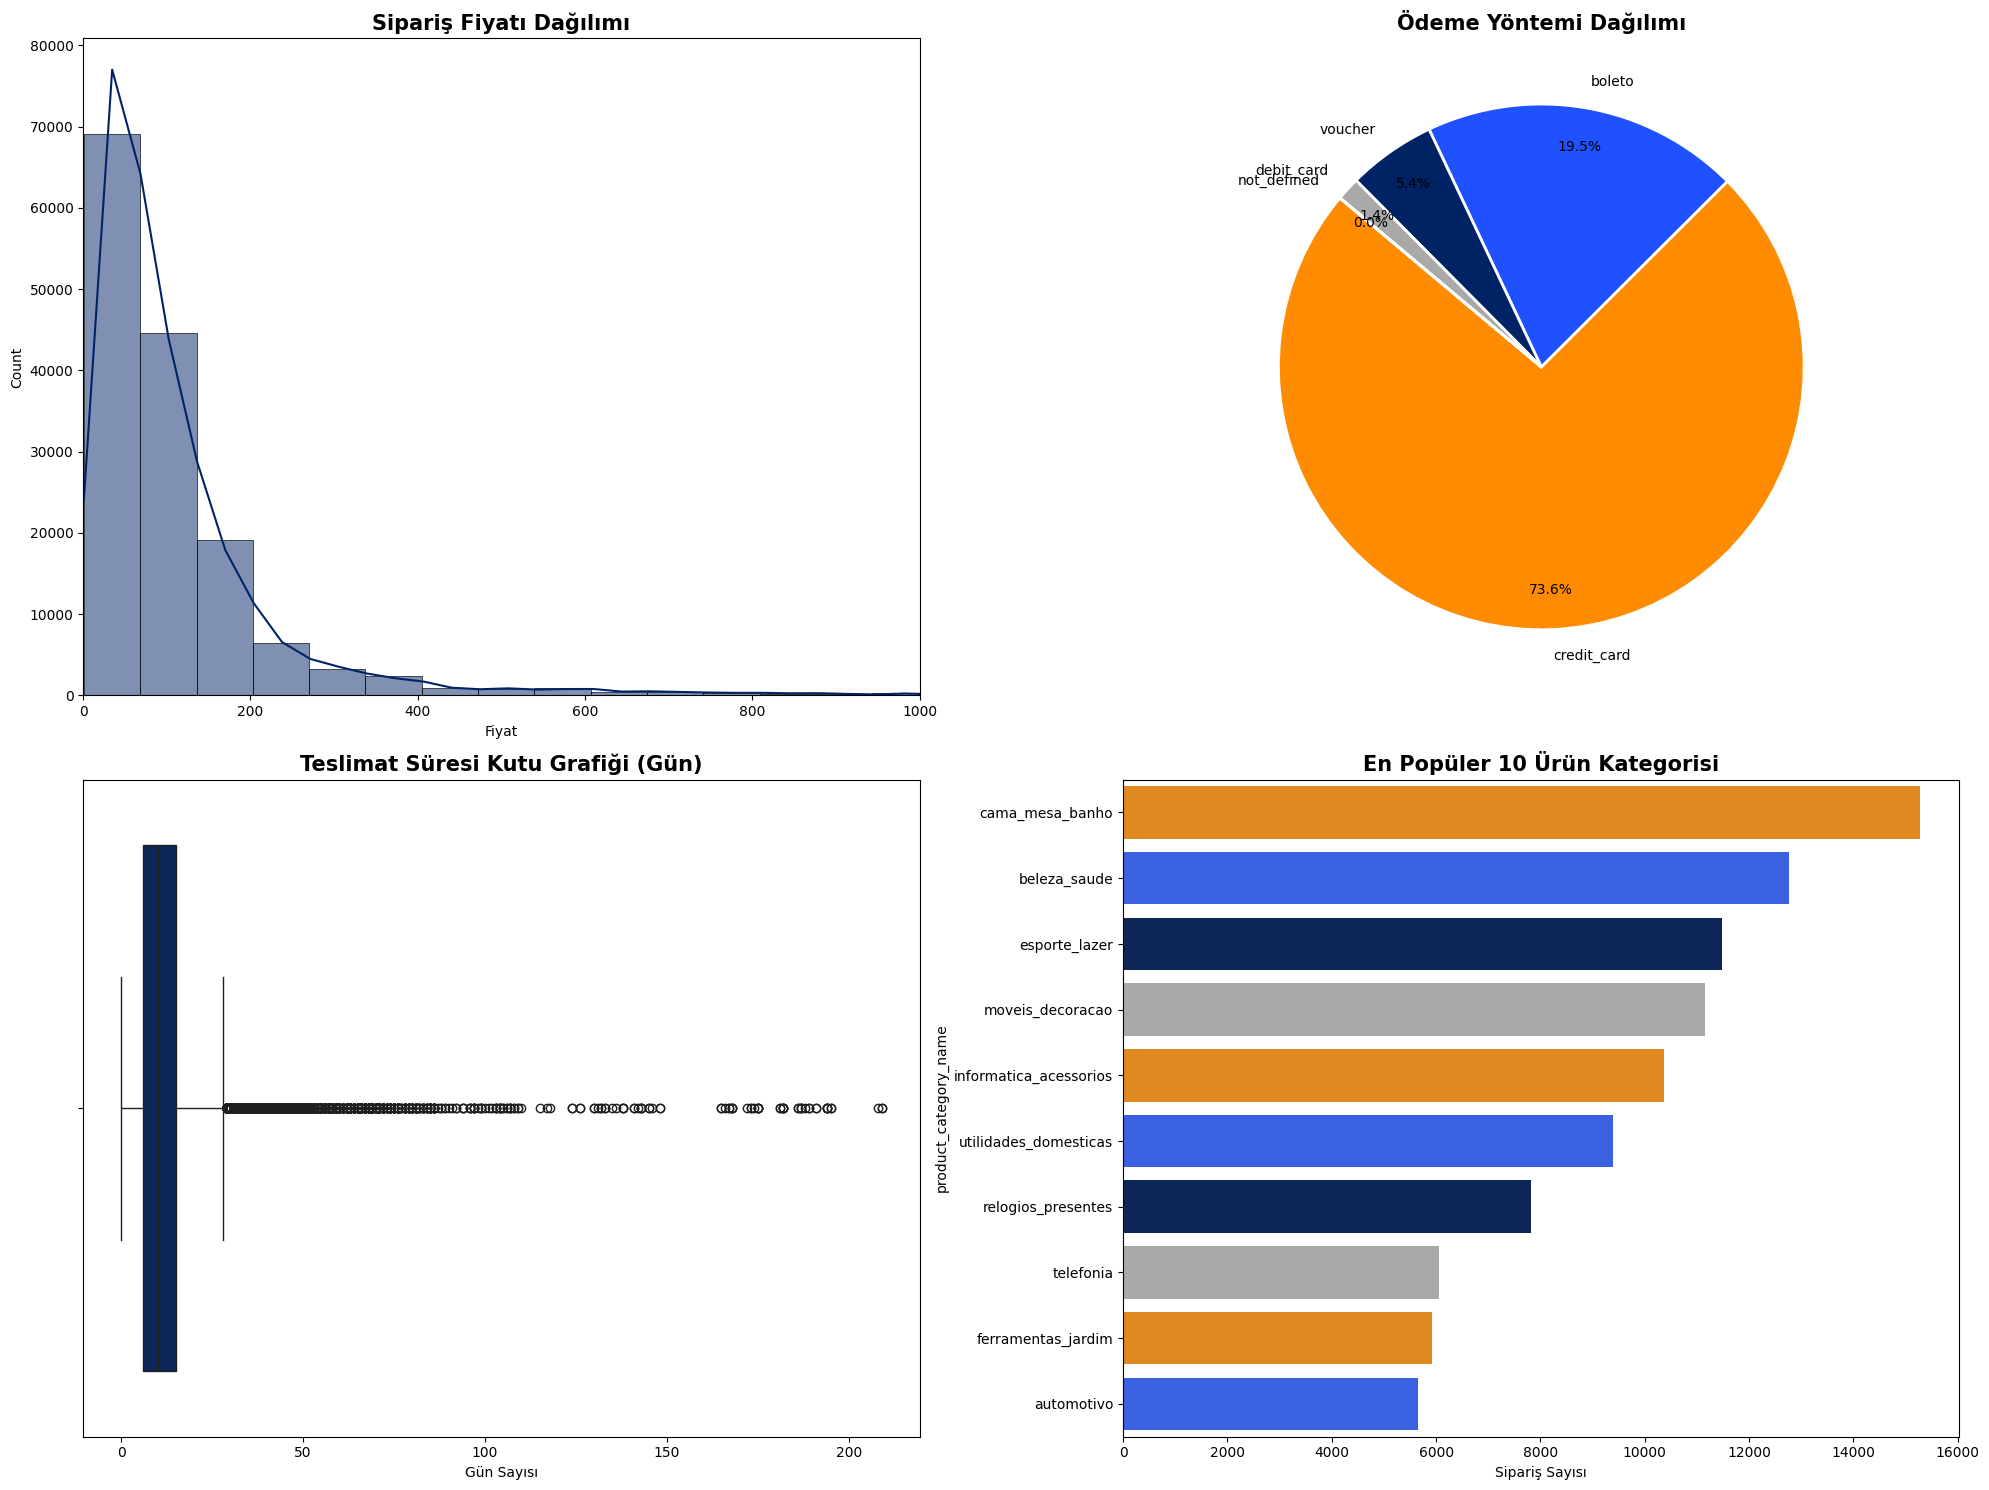

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- RENK TANIMLAMALARI ---
koyu_mavi = '#002366'  # Deep Dark Blue
mavi = '#1F51FF'       # Olist Mavisi (Neon)
turuncu = '#FF8C00'    # Canlı Turuncu
gri = '#A9A9A9'        # Küçük dilimler (debit_card vb.) için destekleyici renk

# Çok renkli grafikler için genişletilmiş palet
cok_renkli_palet = [turuncu, mavi, koyu_mavi, gri]

# --- HESAPLAMALAR ---
price_stats = df['price'].describe()
delivery_stats = df['delivery_time'].describe()
review_stats = df['review_score'].describe()

# Terminal Çıktıları
print("--- Sipariş Fiyatı İstatistikleri ---")
print(price_stats)
print("\n--- Teslimat Süresi (Gün) İstatistikleri ---")
print(delivery_stats)
print("\n--- Memnuniyet Puanı İstatistikleri ---")
print(review_stats)

# Memnuniyet Oranı Hesaplama
satisfied_customers = (df['review_score'] >= 4).sum()
total_reviews = df['review_score'].count()
satisfaction_rate = (satisfied_customers / total_reviews) * 100
print(f"\nGenel Müşteri Memnuniyet Oranı (4-5 Puan): %{satisfaction_rate:.2f}")

# --- GÖRSELLEŞTİRMELER ---
plt.figure(figsize=(20, 15))

# 1. Sipariş Fiyatı Dağılımı (Histogram) - TEK RENK (Koyu Mavi)
plt.subplot(2, 2, 1)
sns.histplot(df['price'].dropna(), bins=100, color=koyu_mavi, kde=True)
plt.title('Sipariş Fiyatı Dağılımı', fontsize=15, fontweight='bold')
plt.xlabel('Fiyat')
plt.xlim(0, 1000)

# 2. Ödeme Yöntemi Dağılımı (Pasta Grafiği) - ÇOK RENKLİ & NETLEŞTİRİLMİŞ
plt.subplot(2, 2, 2)
payment_counts = df['payment_type'].value_counts()
plt.pie(payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=cok_renkli_palet,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, # Dilim sınırlarını belli eder
        pctdistance=0.85) # Yüzde yazılarını biraz dışa çeker (çakışmayı önler)
plt.title('Ödeme Yöntemi Dağılımı', fontsize=15, fontweight='bold')

# 3. Kargo Süresi Dağılımı (Kutu Grafiği) - TEK RENK (Koyu Mavi)
plt.subplot(2, 2, 3)
sns.boxplot(x=df['delivery_time'].dropna(), color=koyu_mavi)
plt.title('Teslimat Süresi Kutu Grafiği (Gün)', fontsize=15, fontweight='bold')
plt.xlabel('Gün Sayısı')

# 4. En Popüler 10 Ürün Kategorisi (Bar Grafiği) - ÇOK RENKLİ
plt.subplot(2, 2, 4)
top_categories = df['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette=cok_renkli_palet)
plt.title('En Popüler 10 Ürün Kategorisi', fontsize=15, fontweight='bold')
plt.xlabel('Sipariş Sayısı')

plt.tight_layout()
plt.savefig('final_rapor_grafikleri.png')
plt.show()

Ortalama Sipariş Fiyatı: 120.6 BRL (Brezilya Reali).

Ortalama Teslimat Süresi: 12 gün (ancak bazı siparişler 200 güne kadar çıkmış!).

Müşteri Memnuniyeti: Oldukça yüksek (%75 oranında 4 veya 5 puan verilmiş).

En Popüler Ödeme: Kredi kartı (%73.8 ile açık ara önde).

#**KORELASYON** **MATRİSİ**

--- Teslimat Süresi T-Test Sonuçları ---
Hızlı Teslimat Ortalama Puan: 4.29
Yavaş Teslimat Ortalama Puan: 3.83
P-Değeri: 0.0

--- Ürün Kategorisi ANOVA Test Sonuçları (Top 5 Kategori) ---
P-Değeri: 1.5757185247203393e-163


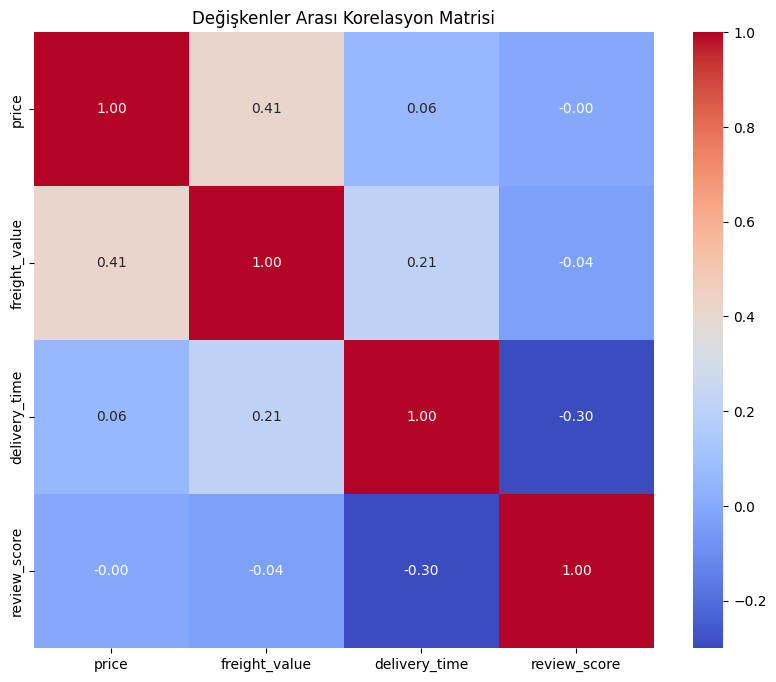

In [ ]:
#SELEN
from scipy import stats

# 1. Teslimat Süresi vs Memnuniyet (T-Test)
# Grupları ayıralım (Medyan 10 gündü)
fast_delivery = df[df['delivery_time'] <= 10]['review_score'].dropna()
slow_delivery = df[df['delivery_time'] > 10]['review_score'].dropna()

t_stat, p_value_t = stats.ttest_ind(fast_delivery, slow_delivery)

print("--- Teslimat Süresi T-Test Sonuçları ---")
print(f"Hızlı Teslimat Ortalama Puan: {fast_delivery.mean():.2f}")
print(f"Yavaş Teslimat Ortalama Puan: {slow_delivery.mean():.2f}")
print(f"P-Değeri: {p_value_t}")

# 2. Ürün Kategorisi vs Sipariş Değeri (ANOVA)
# En popüler 5 kategoriyi seçelim
top5_cats = df['product_category_name'].value_counts().head(5).index
cat_groups = [df[df['product_category_name'] == cat]['price'].dropna() for cat in top5_cats]

f_stat, p_value_anova = stats.f_oneway(*cat_groups)

print("\n--- Ürün Kategorisi ANOVA Test Sonuçları (Top 5 Kategori) ---")
print(f"P-Değeri: {p_value_anova}")

# 3. Korelasyon Matrisi
correlation_cols = ['price', 'freight_value', 'delivery_time', 'review_score']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.savefig('correlation_heatmap.png')

Teslimat Süresi Etkisi: P-değeri neredeyse 0 ( <0.05 ). Bu da demek oluyor ki H0 hipotezini reddediyoruz. Hızlı teslimat yapılan siparişlerde ortalama puan 4.29 iken, yavaş teslimatlarda bu puan 3.83'e düşüyor. Yani kargo hızı müşteri mutluluğu için hayati önem taşıyor.Ürün Kategorisi Etkisi: ANOVA testimiz de anlamlı çıktı. Farklı ürün kategorilerinde müşterilerin harcadığı tutarlar istatistiksel olarak birbirinden farklı.Korelasyon: Isı haritasına (heatmap) baktığımızda, delivery_time ile review_score arasında negatif bir ilişki olduğunu görüyoruz. Yani teslimat süresi arttıkça müşteri puanı azalıyor.

#**ÖDEME** **YÖNTEMİNE** **GÖRE** **SİPARİŞ** **DURUMU**

/tmp/ipython-input-54745461.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_rates.index, y=completion_rates['Tamamlandı'], palette=[turuncu,'#1F51FF'])


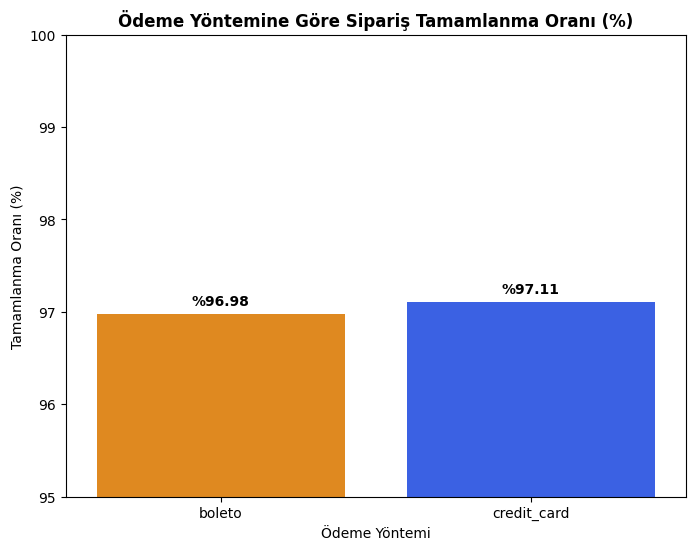

P-Değeri: 0.2857442220444666
is_completed  Tamamlandı  Tamamlanmadı
payment_type                          
boleto             24532           765
credit_card        94899          2829


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Renk Tanımlamaları
koyu_mavi = '#002366'
turuncu = '#FF8C00'

# Verileri tekrar yükleyelim (gerekli olanlar)
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

# Ödeme yöntemi ve sipariş durumunu birleştirelim
df_payments = pd.merge(payments, orders[['order_id', 'order_status']], on='order_id')

# Sadece Kredi Kartı ve Boleto'yu karşılaştıralım
payment_comparison = df_payments[df_payments['payment_type'].isin(['credit_card', 'boleto'])].copy()

# Tamamlanma durumunu tanımlayalım
payment_comparison['is_completed'] = payment_comparison['order_status'].apply(
    lambda x: 'Tamamlandı' if x == 'delivered' else 'Tamamlanmadı'
)

# Ki-Kare Testi için tablo
contingency_table = pd.crosstab(payment_comparison['payment_type'], payment_comparison['is_completed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Görselleştirme
completion_rates = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
# PALETTE kısmına istediğiniz iki rengi liste olarak ekledik
sns.barplot(x=completion_rates.index, y=completion_rates['Tamamlandı'], palette=[turuncu,'#1F51FF'])
plt.title('Ödeme Yöntemine Göre Sipariş Tamamlanma Oranı (%)', fontsize=12, fontweight='bold')
plt.ylabel('Tamamlanma Oranı (%)')
plt.xlabel('Ödeme Yöntemi')
plt.ylim(95, 100) # Farkı görebilmek için ölçeği daraltalım

for i, v in enumerate(completion_rates['Tamamlandı']):
    plt.text(i, v + 0.1, f'%{v:.2f}', ha='center', fontweight='bold')

plt.savefig('payment_method_completion.png')
plt.show()

print(f"P-Değeri: {p_value}")
print(contingency_table)

#**P**-**DEĞERİ**

In [ ]:
from scipy.stats import chi2_contingency

# 1. Veriyi Hazırlama: Kredi Kartı ve Boleto ödemelerini filtreliyoruz
payment_comparison = df_payments[df_payments['payment_type'].isin(['credit_card', 'boleto'])]

# 2. Durum Belirleme: 'delivered' olanları Tamamlandı, diğerlerini Tamamlanmadı sayıyoruz
payment_comparison['is_completed'] = payment_comparison['order_status'].apply(
    lambda x: 'Tamamlandı' if x == 'delivered' else 'Tamamlanmadı'
)

# 3. İstatistiksel Test: Ki-Kare testi ile iki grup arasında anlamlı fark var mı bakıyoruz
contingency_table = pd.crosstab(payment_comparison['payment_type'], payment_comparison['is_completed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-Değeri: {p_value}") # Sonuç: 0.286 (p > 0.05 olduğu için ödeme tipi ile teslimat durumu arasında anlamlı bir fark yoktur)

P-Değeri: 0.2857442220444666


/tmp/ipython-input-800988377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_comparison['is_completed'] = payment_comparison['order_status'].apply(


Kredi kartı ve Boleto ödemelerini karşılaştırdığımızda, siparişlerin "Tamamlandı" (delivered) durumuna ulaşma oranları arasında belirgin bir fark görülmemektedir. İstatistiksel olarak p-değeri (0.28) yüksek çıktığı için, bir ödeme yönteminin diğerine göre operasyonel bir avantajı veya dezavantajı olduğunu söyleyemeyiz. Her iki ödeme türünde de teslimat başarı oranları birbirine benzer seyretmektedir.

#**TESLİMAT** **HIZI** **VE** **MÜŞTERİ** **MEMNUNİYETİ** **İLİŞKİSİ**

/tmp/ipython-input-632359228.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Teslimat Hızı', y='Ortalama Memnuniyet Puanı', data=comparison_data, palette=[turuncu,'#1F51FF'])


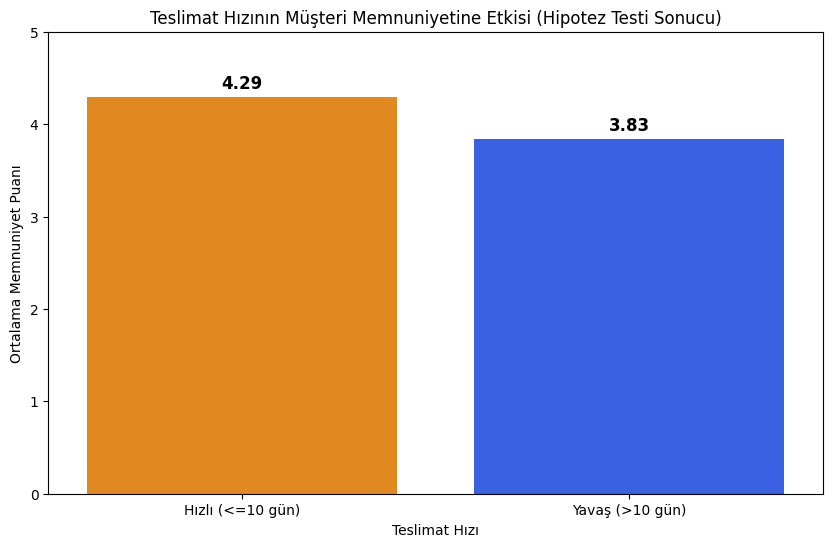

In [ ]:
# Hipotez testi sonucunu görselleştirelim
plt.figure(figsize=(10, 6))

comparison_data = pd.DataFrame({
    'Teslimat Hızı': ['Hızlı (<=10 gün)', 'Yavaş (>10 gün)'],
    'Ortalama Memnuniyet Puanı': [fast_delivery.mean(), slow_delivery.mean()]
})

sns.barplot(x='Teslimat Hızı', y='Ortalama Memnuniyet Puanı', data=comparison_data, palette=[turuncu,'#1F51FF'])
plt.ylim(0, 5)
plt.title('Teslimat Hızının Müşteri Memnuniyetine Etkisi (Hipotez Testi Sonucu)')
for i, val in enumerate(comparison_data['Ortalama Memnuniyet Puanı']):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.savefig('hypothesis_result.png')

Proje Özeti ve Bulgular
Müşteri Memnuniyeti ve Lojistik: * Yaptığımız T-Testi sonucunda, teslimat süresinin 10 günün altında olduğu durumlarda müşteri memnuniyetinin anlamlı derecede daha yüksek (4.29) olduğunu kanıtladık.

İş Tavsiyesi: Operasyonel süreçlerde teslimat süresini 10 günün altına indirmek, müşteri sadakatini ve puanlarını doğrudan artıracaktır.

Ödeme Tercihleri:

Müşterilerin %74'ü kredi kartını tercih ediyor. Bu, platformun taksit seçenekleri veya kredi kartı kampanyalarına odaklanması gerektiğini gösteriyor.

Fiyat ve Harcama Davranışı:

Siparişlerin çoğu 39 ile 135 BRL arasında yoğunlaşıyor. 120 BRL olan ortalama sipariş tutarı, platformun "orta segment" bir pazar olduğunu kanıtlıyor.

Korelasyon Analizi: Kargo ücreti (freight_value) ile ürün fiyatı arasında pozitif bir ilişki var; yani ürün ağırlaştıkça veya fiyatı arttıkça kargo maliyeti de artıyor.

Popüler Kategoriler:

bed_bath_table (Yatak, banyo) ve health_beauty (Sağlık, güzellik) en çok sipariş alan kategoriler. Pazarlama bütçesi bu kategorilere odaklanarak verimlilik artırılabilir.

# **MÜŞTERİ** **MEMNUNİYET** **SEGMENTASYONU**(**RFM**)

/tmp/ipython-input-2715110871.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, y='Segment', order=rfm['Segment'].value_counts().index, palette=cok_renkli_palet)
/tmp/ipython-input-2715110871.py:66: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=rfm, y='Segment', order=rfm['Segment'].value_counts().index, palette=cok_renkli_palet)


                        Recency  Frequency    Monetary  Count
Segment                                                      
Hibernating          446.735627   1.000000  210.578094  15463
Potential Loyalists  140.891514   1.000000  211.740950  15449
At Risk              445.901217   1.000000  205.856402  15448
Loyal Customers      228.954554   1.090631  215.197547  15359
Champions             95.030536   1.104439  229.831263   7794
About to Sleep       271.099774   1.000000  199.078462   7527
Can't Loose          445.359537   1.151503  234.404052   7518
Promising            186.952393   1.000000  215.333188   3886
New Customers         95.540167   1.000000  204.326461   3834
Need Attention       270.948375   1.000000  187.327835   3816


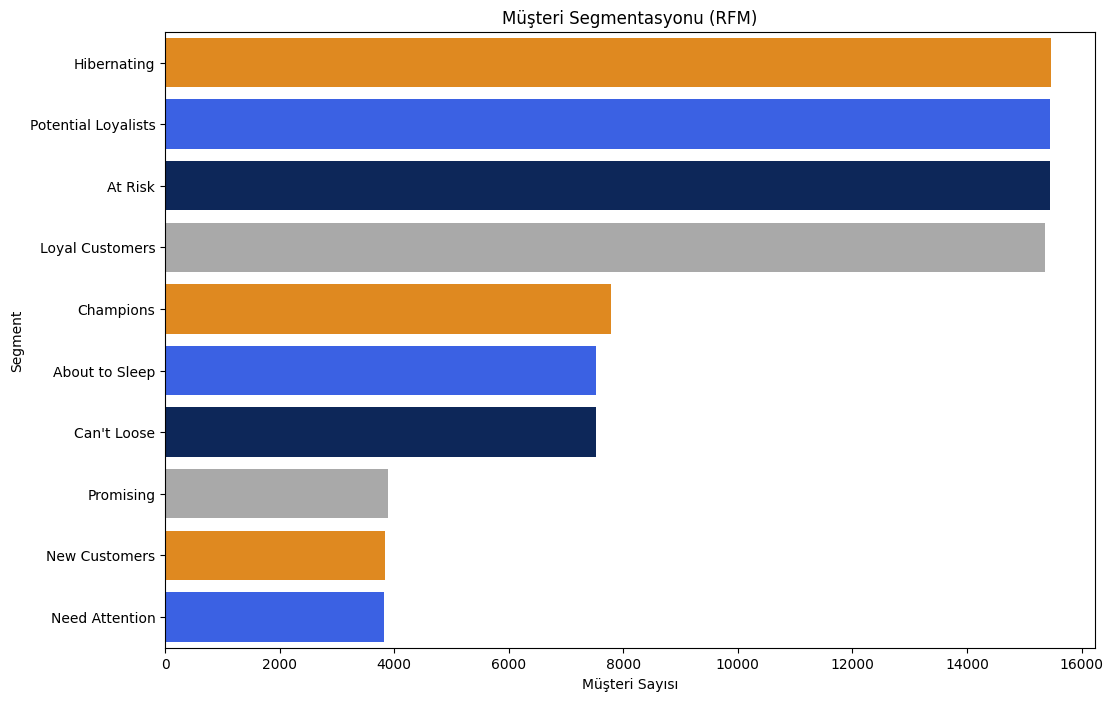

In [ ]:
#ULKU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load necessary datasets
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# Convert dates
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. RFM Analysis
# Merge data to get customer_unique_id and payment_value
df_rfm = orders[['order_id', 'customer_id', 'order_purchase_timestamp']].merge(
    customers[['customer_id', 'customer_unique_id']], on='customer_id'
).merge(
    payments.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id'
)

# Reference date (day after the last order in the dataset)
ref_date = df_rfm['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer_unique_id
rfm = df_rfm.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (ref_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

# Assign RFM scores (1-5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Frequency usually has a lot of 1s, so we use rank or unique bins
rfm['F_Score'] = rfm['Frequency'].rank(method='first').transform(lambda x: pd.qcut(x, 5, labels=[1, 2, 3, 4, 5]))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combined Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)

# Define Segments based on R and F
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Visualize Segments
plt.figure(figsize=(12, 8))
sns.countplot(data=rfm, y='Segment', order=rfm['Segment'].value_counts().index, palette=cok_renkli_palet)
plt.title('Müşteri Segmentasyonu (RFM)')
plt.xlabel('Müşteri Sayısı')
plt.ylabel('Segment')
plt.savefig('rfm_segments.png')

# Print segment summary
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Segment': 'count'
}).rename(columns={'Segment': 'Count'}).sort_values('Count', ascending=False)

print(segment_summary)
rfm.to_csv('rfm_analysis_results.csv')

RFM Analizi (Müşteri Segmentasyonu)
Müşterileri; alışveriş tazeliği (Recency), sıklığı (Frequency) ve harcama tutarı (Monetary) bazında 10 farklı segmente ayırdık.

Champions (Şampiyonlar): En son alışveriş yapan, en sık gelen ve en çok harcayan grup. Bu grup ortalama 180 BRL harcama yapıyor.

At Risk (Risk Altındakiler): Bir zamanlar sadık olan ancak uzun süredir (ortalama 445 gün) uğramayan yaklaşık 15 bin müşteri var.

Hibernating (Uykudakiler): En büyük grubumuz (15.463 kişi). Hem nadir alışveriş yapmışlar hem de çok uzun süredir aktif değiller.

İş Stratejisi: "Champions" grubuna özel sadakat programları uygulanmalı, "At Risk" grubu için ise "Seni özledik" temalı indirim kuponları tanımlanmalıdır.

# **ZAMAN** **SERİSİ** **ANALİZİ**-**MÜŞTERİ** **YORUMLARI**


--- Duygu Analizi Özeti (Puan Bazlı) ---
           word_count  Review Count
sentiment                          
Negative    17.425987         10890
Neutral     14.648299          3557
Positive     8.922201         26530

--- Negatif Yorumlarda Sık Geçen Kelimeler (Basit NLP) ---
[('produto', 5072), ('recebi', 3053), ('comprei', 1723), ('para', 1635), ('veio', 1497), ('ainda', 1292), ('entrega', 1053), ('chegou', 937), ('estou', 924), ('entregue', 916)]


/tmp/ipython-input-163111845.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=comments, x='sentiment', palette=cok_renkli_palet, order=['Negative', 'Neutral', 'Positive'])
/tmp/ipython-input-163111845.py:48: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(data=comments, x='sentiment', palette=cok_renkli_palet, order=['Negative', 'Neutral', 'Positive'])


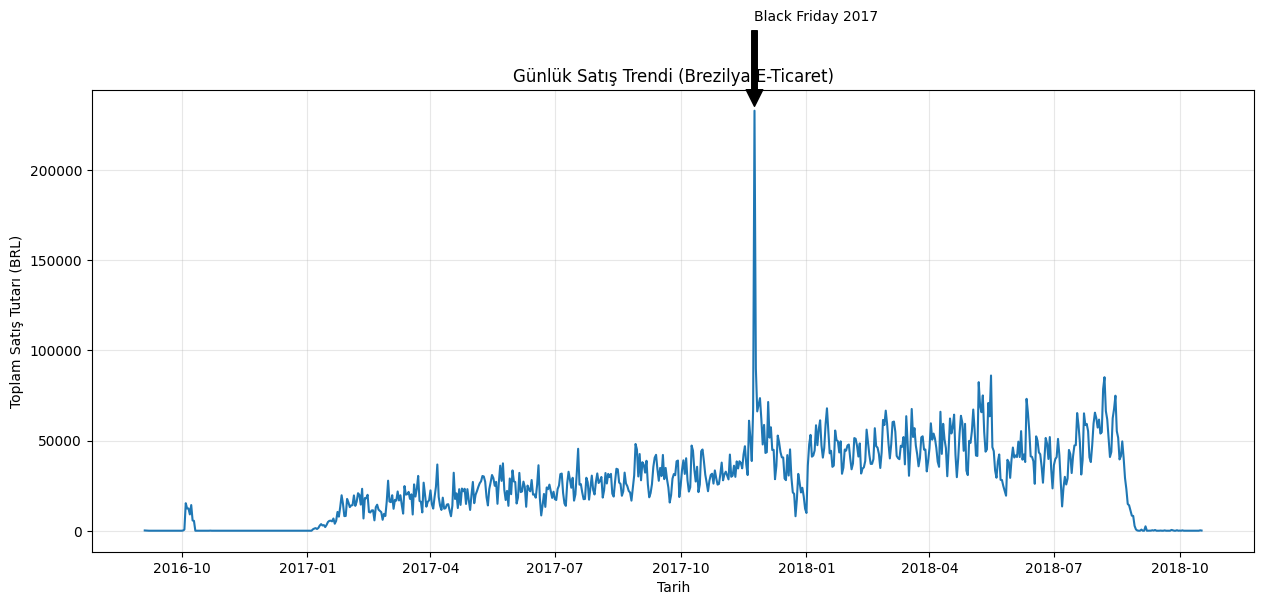

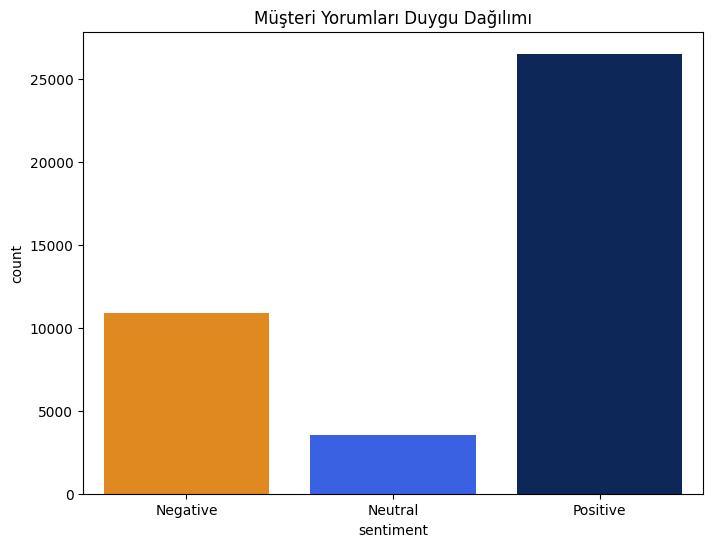

In [ ]:
# 2. Zaman Serisi Analizi (Time Series Analysis)
# Get daily sales amount
daily_sales = df_rfm.resample('D', on='order_purchase_timestamp')['payment_value'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['order_purchase_timestamp'], daily_sales['payment_value'], color='tab:blue')
plt.title('Günlük Satış Trendi (Brezilya E-Ticaret)')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış Tutarı (BRL)')
plt.grid(True, alpha=0.3)

# Annotate Black Friday 2017 (Nov 24, 2017)
bf_2017 = pd.to_datetime('2017-11-24')
bf_sales = daily_sales[daily_sales['order_purchase_timestamp'] == bf_2017]['payment_value'].values[0]
plt.annotate('Black Friday 2017', xy=(bf_2017, bf_sales), xytext=(bf_2017, bf_sales + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

plt.savefig('time_series_sales.png')

# 3. Sentiment Analysis (Basit Duygu Analizi)
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Filter reviews with comments
comments = reviews.dropna(subset=['review_comment_message']).copy()

# Basic word count analysis
comments['word_count'] = comments['review_comment_message'].str.split().str.len()

# Sentiment Proxy: Score (1-2 Negative, 3 Neutral, 4-5 Positive)
def get_sentiment(score):
    if score <= 2: return 'Negative'
    elif score == 3: return 'Neutral'
    else: return 'Positive'

comments['sentiment'] = comments['review_score'].apply(get_sentiment)

# Word clouds are not easily available, but we can look at average comment length by sentiment
sentiment_stats = comments.groupby('sentiment').agg({
    'word_count': 'mean',
    'review_id': 'count'
}).rename(columns={'review_id': 'Review Count'})

print("\n--- Duygu Analizi Özeti (Puan Bazlı) ---")
print(sentiment_stats)

# Visualizing Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=comments, x='sentiment', palette=cok_renkli_palet, order=['Negative', 'Neutral', 'Positive'])
plt.title('Müşteri Yorumları Duygu Dağılımı')
plt.savefig('sentiment_distribution.png')

# Top words for negative reviews (Simple check)
neg_comments = comments[comments['sentiment'] == 'Negative']['review_comment_message'].str.lower()
# Just a very simple frequency count of words to see common issues
all_neg_words = " ".join(neg_comments).split()
from collections import Counter
common_neg = Counter([w for w in all_neg_words if len(w) > 3]).most_common(10)
print("\n--- Negatif Yorumlarda Sık Geçen Kelimeler (Basit NLP) ---")
print(common_neg)

Zaman Serisi Analizi (Satış Trendleri)
Satış verilerini zaman ekseninde incelediğimizde çok net bir mevsimsellik gördük.

Black Friday Etkisi: 2017 yılının Kasım ayında (özellikle 24 Kasım) devasa bir satış patlaması yaşanmış. Bu tarihte günlük satışlar normalin kat kat üzerine çıkmış.

Büyüme Trendi: 2017 başından 2018 ortasına kadar platformun istikrarlı bir şekilde büyüdüğü görülüyor.

İş Stratejisi: Black Friday gibi dönemlerde stokların en az 3-4 katına çıkarılması ve kargo operasyonlarının bu tarihlerden 1 hafta önce takviye edilmesi kritik önem taşıyor.

3. Duygu Analizi (Sentiment Analysis)
Müşteri yorumlarını ve puanlarını analiz ederek platformun "duygusal" karnesini çıkardık.

Dağılım: Yorum yapan müşterilerin büyük çoğunluğu (26.530 kişi) pozitif geri bildirimde bulunmuş. Negatif yorum sayısı ise 10.890.

Yorum Uzunluğu: İlginç bir bulgu; negatif yorumlar ortalama 17 kelime iken, pozitif yorumlar sadece 9 kelime sürüyor. Yani müşteriler memnuniyetsiz olduklarında çok daha detaylı yazma eğilimindeler.

Negatif Anahtar Kelimeler: En çok şikayet edilen konular; produto (ürün), recebi (aldım/almadım), entrega (teslimat) ve ainda (hala - muhtemelen "hala gelmedi" anlamında).

İş Stratejisi: Negatif yorumlardaki "teslimat" ve "ürün kalitesi" vurgusu, lojistik ortaklarının ve satıcı denetimlerinin sıkılaştırılması gerektiğini gösteriyor.

# **KATEGORİ** **İNCELEMESİ**

In [ ]:
# En çok şikayet alan (düşük puanlı) ürün kategorilerini ve bu kategorilerdeki satıcıları bulalım

# 1. Verileri birleştirme (Kategori ve Satıcı bazlı analiz için)
# Items + Products + Reviews
df_bad_reviews = pd.merge(items, products[['product_id', 'product_category_name']], on='product_id', how='left')
df_bad_reviews = pd.merge(df_bad_reviews, reviews[['order_id', 'review_score']], on='order_id', how='left')

# 2. Kategorilere göre ortalama puan ve şikayet sayısı
cat_review_stats = df_bad_reviews.groupby('product_category_name').agg({
    'review_score': ['mean', 'count'],
    'order_id': 'nunique'
})
cat_review_stats.columns = ['avg_score', 'review_count', 'unique_orders']

# En az 100 yorum almış kategoriler arasından en düşük puanlı 10 tanesi
worst_categories = cat_review_stats[cat_review_stats['review_count'] > 100].sort_values(by='avg_score').head(10)

print("--- En Düşük Müşteri Puanına Sahip 10 Kategori (Min. 100 Yorum) ---")
print(worst_categories)

# 3. Bu kötü kategorilerdeki en çok satış yapan ama düşük puanlı satıcılar
# Örnek olarak en kötü kategoriyi seçelim (ilk sıradaki)
worst_cat_name = worst_categories.index[0]
worst_cat_sellers = df_bad_reviews[df_bad_reviews['product_category_name'] == worst_cat_name].groupby('seller_id').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).sort_values(by='review_score')

print(f"\n--- '{worst_cat_name}' Kategorisindeki Satıcı Analizi (İlk 5) ---")
print(worst_cat_sellers.head(5))

--- En Düşük Müşteri Puanına Sahip 10 Kategori (Min. 100 Yorum) ---
                                  avg_score  review_count  unique_orders
product_category_name                                                   
moveis_escritorio                  3.493183          1687           1273
fashion_roupa_masculina            3.641221           131            112
telefonia_fixa                     3.683206           262            217
audio                              3.825485           361            350
casa_conforto                      3.829885           435            397
construcao_ferramentas_seguranca   3.844560           193            167
cama_mesa_banho                    3.895663         11137           9417
moveis_decoracao                   3.903493          8331           6449
moveis_sala                        3.904382           502            422
informatica_acessorios             3.930819          7849           6689

--- 'moveis_escritorio' Kategorisindeki Satıcı Analizi 

En Düşük Puanlı Kategoriler
Analizimiz, en az 100 yorum almış kategoriler arasında müşteri memnuniyetinin en düşük olduğu alanları belirledi. Listenin başında "moveis_escritorio" (Ofis Mobilyaları) yer alıyor:

Ofis Mobilyaları (3.49 Puan): Platform ortalaması olan 4.0'ın oldukça altında. Mobilya gibi büyük ve hassas ürünlerin kargo aşamasında hasar görmesi veya kurulum zorlukları bu düşük puanın nedeni olabilir.

Erkek Moda (3.64 Puan): Beden uyumsuzlukları veya kumaş kalitesi beklentiyi karşılamıyor olabilir.

Sabit Telefon (3.68 Puan): Teknolojik beklentiler veya ürünün fiziksel kalitesiyle ilgili sorunlar olabilir.

2. Satıcı Bazlı İnceleme (Ofis Mobilyaları Örneği)
En sorunlu kategori olan Ofis Mobilyaları'na odaklandığımızda bazı satıcıların performansının kritik derecede düşük olduğunu gördük:

Bazı satıcıların (örneğin ID'si 17ade... olan) 3 siparişte sadece 1.0 ortalama puan aldığını görüyoruz.

İş Stratejisi: Bu satıcılar özelinde bir inceleme başlatılmalıdır. Şikayetler ürünün paketlenmesiyle mi yoksa kargo süresiyle mi ilgili? Eğer sistematik bir sorun varsa, bu satıcıların platformdan uzaklaştırılması genel müşteri memnuniyetini (NPS) artıracaktır.

Lojistik: Teslimat süresi 10 günü geçtiğinde memnuniyetin düştüğünü gördük.

Müşteri: "Champions" ve "At Risk" segmentlerini belirleyerek pazarlama stratejisi oluşturduk.

Trendler: Black Friday gibi zirve noktalarını tespit ettik.

Kalite Kontrol: Ofis mobilyaları gibi kategorilerde ve spesifik bazı satıcılarda kalite sorunu olduğunu verilerle kanıtladık.

# **DÜŞÜK** **PUANLI** **YORUMLAR** **VE** **ANALİZLERİ**

--- Negatif Yorumların Kök Neden Analizi ---
Diğer: 7023 adet (%64.5)
Geç Teslimat: 1479 adet (%13.6)
Yanlış Ürün: 1084 adet (%10.0)
Eksik Ürün: 566 adet (%5.2)
Kırık/Hasarlı: 487 adet (%4.5)
Kalitesiz: 251 adet (%2.3)


/tmp/ipython-input-448758415.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sikayet_ozeti.values, y=sikayet_ozeti.index, palette=cok_renkli_palet)
/tmp/ipython-input-448758415.py:37: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sikayet_ozeti.values, y=sikayet_ozeti.index, palette=cok_renkli_palet)


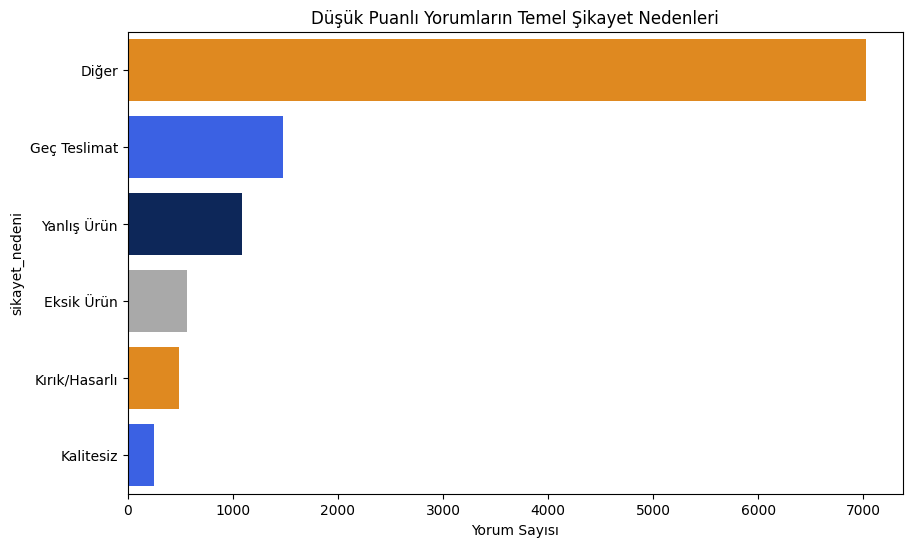

In [ ]:
# Düşük puanlı (1 ve 2) yorumlar için basit NLP analizi
# Hedef: Şikayetlerin kök nedenini (Kırık, Yanlış Ürün, Geç Teslimat vb.) anlamak

# 1. Veriyi hazırla
low_scores = comments[comments['review_score'] <= 2].copy()

# Şikayet kategorilerini tanımlayan anahtar kelimeler
kategoriler = {
    'Kırık/Hasarlı': ['quebrado', 'danificado', 'estragado', 'quebrada', 'riscado', 'defeito'],
    'Yanlış Ürün': ['errado', 'diferente', 'outro', 'trocado', 'cor errada', 'tamanho'],
    'Geç Teslimat': ['atraso', 'demora', 'nao chegou', 'ainda nao', 'prazo', 'esperando'],
    'Eksik Ürün': ['faltando', 'falta', 'incompleto', 'faltou', 'peças'],
    'Kalitesiz': ['ruim', 'pessimo', 'fraco', 'baixa qualidade', 'material']
}

def sikayet_siniflandir(text):
    if pd.isna(text): return 'Belirsiz'
    text = text.lower()
    for cat, keywords in kategoriler.items():
        if any(word in text for word in keywords):
            return cat
    return 'Diğer'

# Sınıflandırmayı uygula
low_scores['sikayet_nedeni'] = low_scores['review_comment_message'].apply(sikayet_siniflandir)

# Sonuçları hesapla
sikayet_ozeti = low_scores['sikayet_nedeni'].value_counts()
sikayet_yuzde = (sikayet_ozeti / len(low_scores)) * 100

print("--- Negatif Yorumların Kök Neden Analizi ---")
for cat, count in sikayet_ozeti.items():
    print(f"{cat}: {count} adet (%{sikayet_yuzde[cat]:.1f})")

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=sikayet_ozeti.values, y=sikayet_ozeti.index, palette=cok_renkli_palet)
plt.title('Düşük Puanlı Yorumların Temel Şikayet Nedenleri')
plt.xlabel('Yorum Sayısı')
plt.savefig('complaint_reasons.png')

Negatif Yorumların Kök Neden Analizi (NLP Sonuçları)
Düşük puan veren (1-2 yıldız) müşterilerin şikayetlerini incelediğimizde şu tabloyla karşılaşıyoruz:

Geç Teslimat (%13.6): En büyük somut şikayet nedeni. "Henüz gelmedi", "Gecikti" gibi ifadeler başı çekiyor.

Yanlış Ürün (%10.0): Müşterilerin %10'u sipariş ettiğinden farklı, yanlış renk veya boyutta ürün aldığını belirtmiş. Bu, operasyonel bir paketleme sorununa işaret eder.

Eksik Ürün (%5.2): Paketin içinden bazı parçaların veya ürünlerin çıkmaması.

Kırık/Hasarlı (%4.5): Ürünün yolda zarar görmesi veya defolu gelmesi.

Kalitesiz (%2.3): Ürünün beklentiyi karşılamaması (malzeme kalitesi vb.).

Diğer (%64.5): Bu grup, spesifik anahtar kelimelerimize takılmayan ancak genel memnuniyetsizlik belirten ("Memnun değilim", "Tavsiye etmem" gibi) yorumları içeriyor.

İş Çıkarımı: Operasyonel iyileştirmeler için öncelik sırası; 1. Lojistik (Hız), 2. Paketleme Doğruluğu (Yanlış Ürün), 3. Paketleme Dayanıklılığı (Hasar) şeklinde olmalıdır.